In [2]:
from tensorflow.keras.datasets import mnist
(train_image, train_labels),(test_image,test_labels)= mnist.load_data()

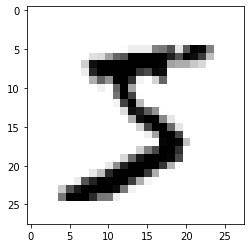

5

In [6]:
import matplotlib.pyplot as plt

digit = train_image[0]

plt.imshow(digit,cmap=plt.cm.binary)
plt.show()
train_labels[0]

In [33]:
import tensorflow as tf
import numpy as np
x = tf.Variable(tf.random.uniform((2,2)))

with tf.GradientTape() as tape:
    y= 2*x+3

grad_of_y= tape.gradient(y,x)
grad_of_y

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [38]:
class Layer:
    def   __init__(self, input_size,output_size,activation):
        self.activation=activation
        weight_shape =(input_size,output_size)
        w_initial_value = tf.random.uniform(weight_shape,minval=0,maxval=1e-1)
        self.W= tf.Variable(w_initial_value)
        b_shape = (output_size,)
        bias_inital_Value = tf.zeros(b_shape)
        self.b=tf.Variable(bias_inital_Value)
    def __call__(self,input):
        return self.activation(tf.matmul(input,self.W)+self.b)
    
    @property
    def Weights(self):
        return [self.W,self.b]


In [36]:
class Sequential():
    def __init__(self,layers):
        self.layers= layers

    def __call__(self,input):
        x= input
        for layer in self.layers:
            x= layer(x)
            return x
            

In [37]:
model = Sequential([Layer(input_size=28*28,output_size=512,activation=tf.nn.relu),
                    Layer(input_size=512,output_size=10,activation=tf.nn.softmax)])

